# K Means Clustering Algorithm

# Syed Aashir Majeed (10173)
# Muqaddas Ashraf (9123)

In [7]:
%matplotlib notebook
from k_means import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from skimage import io
import time


from sklearn.cluster import KMeans as KMeans_

## Simple Customer Segmentation

In [8]:
df = pd.read_csv('example_datasets/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

<IPython.core.display.Javascript object>


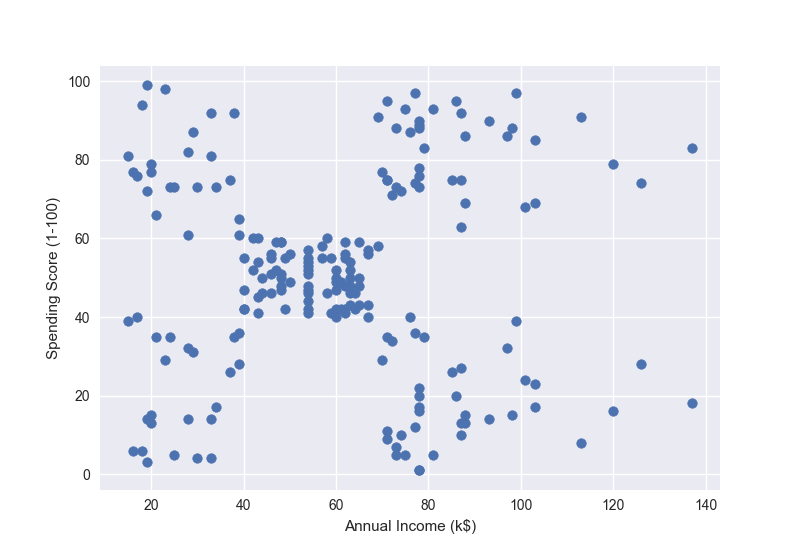

Text(0, 0.5, 'Spending Score (1-100)')

In [10]:
plt.close()
plt.style.use('seaborn')
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [14]:
model = KMeans(max_iter = 500, tolerance = 0.001, n_clusters = 3, runs = 100)
(clusters, data_with_clusters) = model.fit(X)

In [15]:
model.cost_

3899.705512700313

<IPython.core.display.Javascript object>


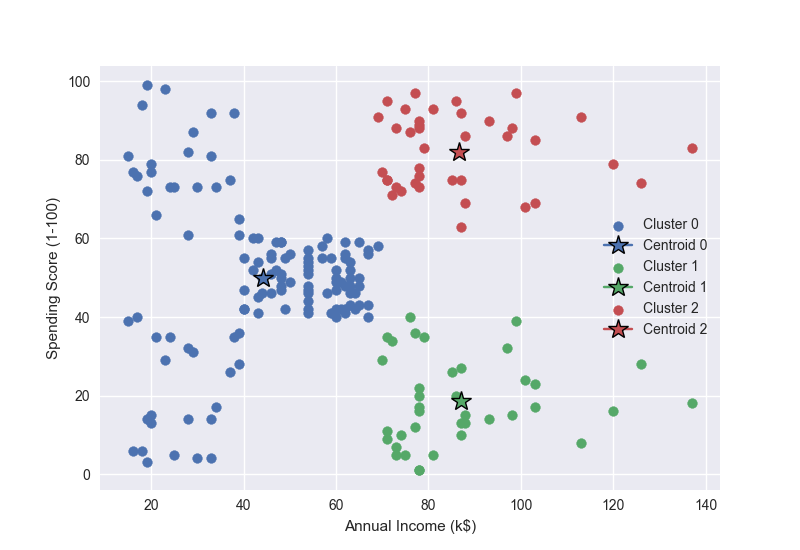

In [16]:
plt.close()
for i, cluster_mean in enumerate(clusters):
    data_cluster_i = data_with_clusters[ data_with_clusters[:, -1] == i ]
    plt.scatter(data_cluster_i[:, 0], data_cluster_i[:, 1], label = 'Cluster ' + str(i))
    plt.plot(cluster_mean[0], cluster_mean[1], label = 'Centroid ' + str(i), marker='*', markersize=15, markeredgecolor="k", markeredgewidth=1)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.style.use('seaborn')
    plt.legend()

## Searching for optimum K by Elbow Method

In [17]:
def elbow_method(X, max_k = 10):
    costs = []
    for k in range(2, max_k):
        model = KMeans(n_clusters=k, init_method='var_part')
        model.fit(X)
        costs.append(model.cost_)
    plt.close()
    plt.plot(list(range(2, max_k)), costs)
    plt.xlabel("# of clusters (K)")
    plt.ylabel("Cost")

<IPython.core.display.Javascript object>


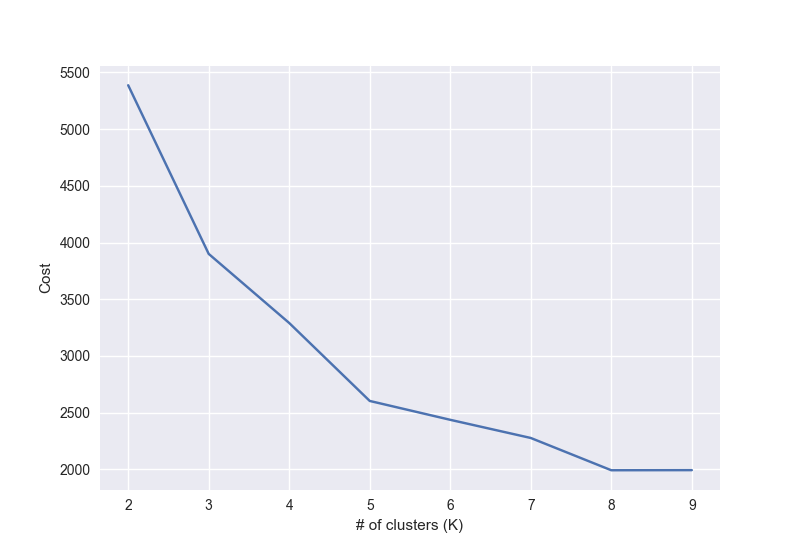

In [18]:
elbow_method(X)

## Image Compression by K Means Clustering

### With OpenCV

In [19]:

cat_img_orig = cv2.imread('example_datasets/sleeping_cats.jpg')

cat_img_orig = cv2.cvtColor(cat_img_orig, cv2.COLOR_BGR2RGB)
cat_img_shape = cat_img_orig.shape
# Convert 3d image array to 2d array
cat_img_orig = cat_img_orig / 255
cat_img = cat_img_orig.reshape(-1, 3)

cat_img_shape

(423, 640, 3)

In [20]:
model = KMeans(n_clusters=16, init_method = 'var_part') # When var_part is used, the algorithm is a lot faster.
cluster_means, image_data_with_clusters = model.fit(cat_img)

In [21]:
model.cost_

14484.706305129

In [22]:
compressed_image = np.zeros(cat_img.shape)

## Assigning each pixel color to its corresponding cluster centroid
for i, cluster in enumerate(image_data_with_clusters[:, -1]):
    compressed_image[i, :] = cluster_means[ int(cluster) ]

In [23]:
compressed_image.shape

(270720, 3)

In [24]:
compressed_image_reshaped = compressed_image.reshape(cat_img_shape)

In [25]:
compressed_image_reshaped.shape

(423, 640, 3)

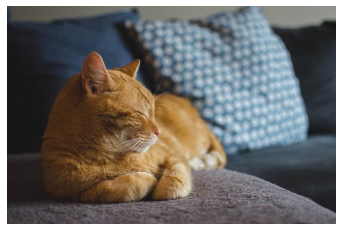

In [26]:
%matplotlib inline
plt.close()
plt.axis('off')
plt.imshow(cat_img_orig)

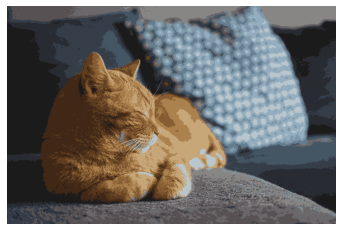

In [27]:
plt.close()
plt.axis('off')
plt.imshow(compressed_image_reshaped)

### With scikit-image

I used scikit-image because openCV was ridiculously increasing the file size, even though I only read the image into matrix and write to a file again.

In [28]:
def compress_by_k_means(image_name, compressed_image_name, n_clusters = 8):
    start = time.time()
    
    image = io.imread(image_name)
    orig_shape = image.shape
    image = image.reshape(-1, image.shape[2]) / 255 # Normalization. It improves the performance so much!
    img_shape = image.shape
    
    
    
    model = KMeans(n_clusters=n_clusters, init_method = 'var_part', tolerance = 0.01)

    cluster_means, image_data_with_clusters = model.fit(image)
    
    compressed_image = np.zeros(img_shape)

    for i, cluster in enumerate(image_data_with_clusters[:, -1]):
        compressed_image[i, :] = cluster_means[ int(cluster) ]
        
    compressed_image = compressed_image * 255
    compressed_image_reshaped = compressed_image.reshape(orig_shape).astype('uint8') # Can't write float type matrix to an image file
    io.imsave(compressed_image_name, compressed_image_reshaped)
    
    end = time.time()
    
    print('Compressed in', end-start, 'seconds') # Calculating the time elapsed while compressing the image. Depends on n_clusters and file size and also on the computer

In [34]:
compress_by_k_means('example_datasets/car.png', 'example_datasets/car_comp.png', n_clusters=5)

### Original Image: 221 kb. Compressed Image: 18 kb

Compressed in 1.4700918197631836 seconds


In [35]:
compress_by_k_means('example_datasets/karakoy.jpg', 'example_datasets/karakoy_comp.jpg', n_clusters=8)

### Original Image: 167 kb. Compressed Image: 125 kb

Compressed in 8.247994899749756 seconds


In [77]:
compress_by_k_means('example_datasets/dog.jpg', 'example_datasets/dog_comp.jpg', n_clusters=16)

## Original Image: 533 kb. Compressed Image: 412 kb

Compressed in 24.668309688568115 seconds


In [78]:
compress_by_k_means('example_datasets/wolf.jpg', 'example_datasets/wolf_comp.jpg', n_clusters=16)

## Original Image: 228 kb. Compressed Image: 183 kb

Compressed in 9.435445785522461 seconds


In [79]:
compress_by_k_means('example_datasets/rabbit.jpg', 'example_datasets/rabbit_comp.jpg', n_clusters=8)

### Original Image: 884 kb. Compressed Image: 689 kb

Compressed in 13.793962717056274 seconds


## EEG Recordings Dataset

In [36]:
df = pd.read_csv('example_datasets/epileptic_seizure.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [37]:
X = df.iloc[:, 1:-1]
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [38]:
n_clusters = df['y'].unique().size

In [39]:
model = KMeans(n_clusters=n_clusters, init_method='var_part')

In [40]:
a = time.time()
clusters, labeled_X = model.fit(X)
b = time.time()

b-a

4.527208089828491

In [41]:
model.cost_

15794238.290983565

In [42]:
a = time.time()
model = KMeans(n_clusters=16, init_method='forgy')
model.fit(X)

b = time.time()

b-a

43.12736368179321

In [56]:
model.cost_

15017239.790582392

## Letter Recognition Dataset

In [2]:
df = pd.read_csv('example_datasets/letter-recognition.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
X = df.iloc[:, 1:]
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
n_clusters = df.iloc[:, 0].unique().size
n_clusters

26

In [45]:
model = KMeans(n_clusters=n_clusters, init_method='var_part', tolerance = 0.001)
a = time.time()
clusters, labeled_X = model.fit(X)
b = time.time()

b-a

1.8468894958496094

In [46]:
model.cost_

107698.44917338352

In [47]:
a = time.time()
model = KMeans(n_clusters=n_clusters, init_method='forgy', tolerance = 0.001)
model.fit(X)

b = time.time()

b-a

1.6438746452331543

In [48]:
model.cost_

107502.15354435568